<img src="assets/logo.png">

Made by **Ellák Somfai**, **Balázs Nagy**

[<img src="assets/open_button.png">](https://colab.research.google.com/github/Fortuz/edu_MethodsAndTools/blob/main/practices/P05_RegressionWork.ipynb)

# Linear regression

In [1]:
# imports
import numpy as np
from matplotlib.pyplot import *   # plotting data

We create synthetic data according to

$$t = y(x; w) +\epsilon = -1 + 2x + 0.5 x^2 + \epsilon \,,$$
where the noise is normal: $\epsilon \sim \mathcal{N}(0, \sigma^2)$ with $\sigma=0.8$.

The independent variable $x$ is taken to be uniformly distributed between -3 and 3: $x\sim\mathcal{U}[-3,3]$


In [2]:
N = 100                          # number of data points
x0, x1 = -3, 3                   # endpoints of the interval for x
sigma = 0.8                      # noise amplitude
w_true = [-1, +2, 0.5]           # ground truth coefficients: w0, w1, w2

def model(x, w):
    return w[0] + w[1]*x + w[2]*x*x

rng = np.random.default_rng(42)  # setup random number generator with fixed seed

# independent variable: uniform in [x0, x1]
x = rng.uniform(x0, x1, N)            # COMPLETE

# target
epsilon = rng.normal(0, sigma, N)
t = model(x, w_true) + epsilon        # COMPLETE
print((epsilon**2).mean())

0.6140769990566411


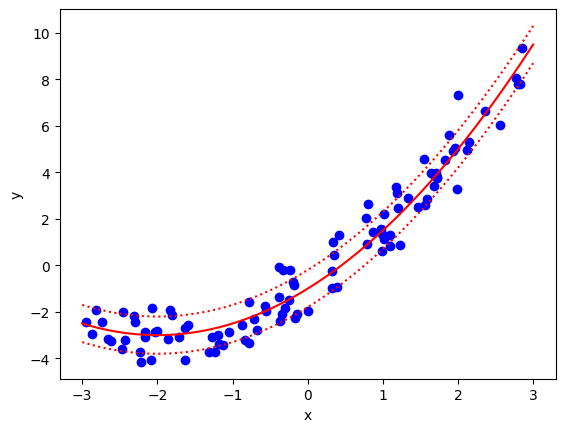

In [40]:
# plot data (blue) and ground truth (red)
plot(x, t, 'bo')                  # data (blue)
x_plot = np.linspace(x0, x1, 200)
y_plot = model(x_plot, w_true)
plot(x_plot, y_plot, 'r-')        # ground truth (red line)
plot(x_plot, y_plot+sigma, 'r:')  # ground truth +- 1*sigma (red dotted)
plot(x_plot, y_plot-sigma, 'r:')
xlabel('x')
ylabel('y')
show()

In [4]:
# loss function: mean squared error
def loss(y_true, y_pred):
    return ((y_true - y_pred)**2).mean()

print('loss for ground truth: {:.5f}'.format(loss(model(x, w_true), t)))

loss for ground truth: 0.61408


General linear model: second order polynomial. Parameters: $w_0, w_1, w_2$;  basis functions:
* $\phi_0(x)=1$,
* $\phi_1(x)=x$,
* $\phi_2(x)=x^2$

In [5]:
Phi = np.stack(([1]*N, x, x*x), axis=1)
print(f'x[:5]: {x[:5]}')
print('Phi.shape:', Phi.shape)
print('Phi[:5]:', Phi[:5])

x[:5]: [ 1.64373629 -0.36672936  2.15158752  1.18420817 -2.43493591]
Phi.shape: (100, 3)
Phi[:5]: [[ 1.          1.64373629  2.701869  ]
 [ 1.         -0.36672936  0.13449042]
 [ 1.          2.15158752  4.62932885]
 [ 1.          1.18420817  1.402349  ]
 [ 1.         -2.43493591  5.9289129 ]]


shape of matrix to be inverted: (3, 3)
w=[-0.94831804  2.00499009  0.47663723]
loss for predicted w: 0.61049


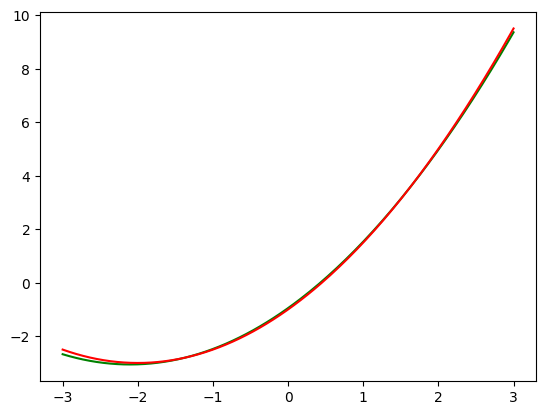

In [6]:
# solution of general linear model
print('shape of matrix to be inverted:', (Phi.T @ Phi).shape)
w = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ t                      # COMPLETE
print(f'w={w}')
plot(x_plot, model(x_plot, w), 'g-')
plot(x_plot, model(x_plot, w_true), 'r-')
print(f'loss for predicted w: {loss(model(x, w), t):.5f}')

## Overfitting
Fitting 10th order polynomial to noisy quadratic data.

w10=[-6.65680198e-01  2.73429426e+00 -4.07129776e-01 -6.92907759e-01
  4.76989510e-01  2.67913070e-01 -7.53244705e-02 -4.54093789e-02
  8.78241382e-04  2.65429227e-03  3.43640545e-04]
loss for predicted w: 0.55086


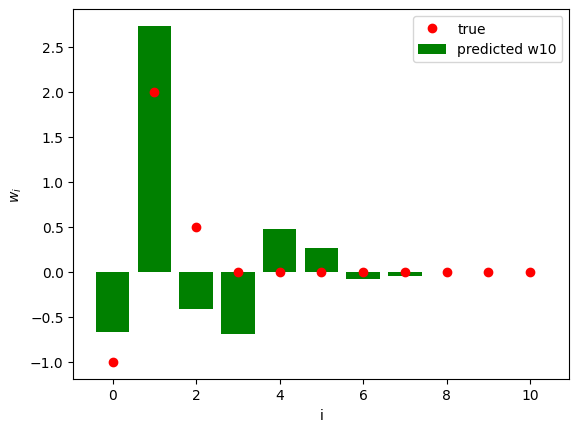

In [7]:
# new model: 10th order polynomial
def model10(x, w):
    return w[0] + w[1]*x + w[2]*x*x + w[3]*x**3 + w[4]*x**4 + w[5]*x**5 + w[6]*x**6 + w[7]*x**7 + w[8]*x**8 + w[9]*x**9 + w[10]*x**10

# solution of general linear model
Phi10 = np.stack(([1]*N, x, x*x, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10), axis=1)
w10 = np.linalg.inv(Phi10.T @ Phi10) @ Phi10.T @ t
print(f'w10={w10}')
print(f'loss for predicted w: {loss(model10(x, w10), t):.5f}')

# plot coefficients
bar(range(11), height=w10, bottom=0, color='green', label='predicted w10')
plot(w_true + [0]*8, 'ro', label='true')
xlabel('i')
ylabel('$w_i$')
legend();

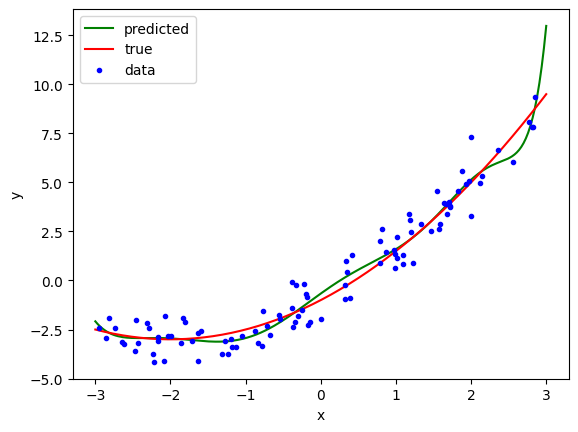

In [8]:
# plot prediction and ground truth (noisless) function
plot(x_plot, model10(x_plot, w10), 'g-', label='predicted')
plot(x_plot, model(x_plot, w_true), 'r-', label='true')
xlabel('x')
ylabel('y')
plot(x, t, 'bo', markersize=3, label='data')                  # data (blue)
legend()

## Regularization
Minimizing
$$\frac{1}{2} \sum_{n=1}^N \left(t-y(x; w)\right)^2 + \frac{\lambda}{2}\sum_d |w_d|^2$$

[-6.08413465e-01  1.27848914e+00 -5.74148358e-02  5.68223294e-01
  8.88312325e-02 -9.23622942e-02  5.76712021e-02 -3.93652343e-03
 -1.74603274e-02  9.98325782e-04  1.22751010e-03]


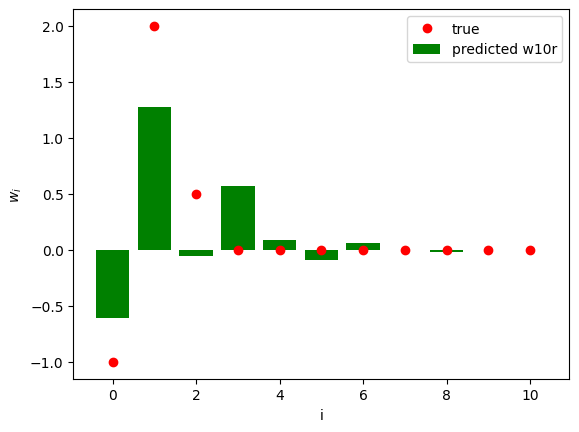

In [9]:
lamb = 10    # lambda is keyword in python
w10r = np.linalg.inv(lamb*np.identity(11) + Phi10.T @ Phi10) @ Phi10.T @ t
print(w10r)

# plot coefficients
bar(range(11), height=w10r, bottom=0, color='green', label='predicted w10r')
plot(w_true + [0]*8, 'ro', label='true')
xlabel('i')
ylabel('$w_i$')
legend();

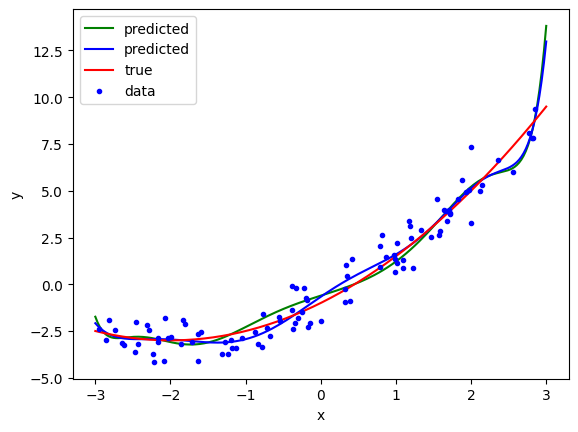

In [10]:
# plot prediction and ground truth (noiseless) function
plot(x_plot, model10(x_plot, w10r), 'g-', label='predicted')
plot(x_plot, model10(x_plot, w10), 'b-', label='predicted')
plot(x_plot, model(x_plot, w_true), 'r-', label='true')
xlabel('x')
ylabel('y')
plot(x, t, 'bo', markersize=3, label='data')                  # data (blue)
legend()

[-5.96205151e-01  1.83943821e+00  1.30617762e-01  2.91208727e-02
  2.37383012e-02  4.25116517e-03  8.68214544e-03 -4.06533595e-04
 -1.90275090e-04 -5.88132164e-05 -8.46652416e-05]


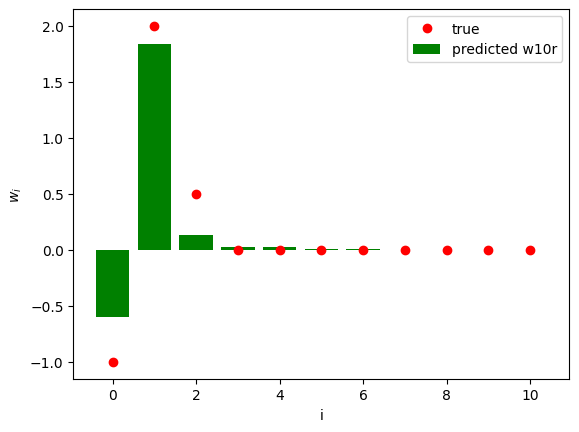

In [11]:
regularizer = np.diagflat([i**4 for i in range(0, 11)])
lamb = 10   # lambda is keyword in python
w10r = np.linalg.inv(lamb*regularizer + Phi10.T @ Phi10) @ Phi10.T @ t
print(w10r)

# plot coefficients
bar(range(11), height=w10r, bottom=0, color='green', label='predicted w10r')
plot(w_true + [0]*8, 'ro', label='true')
xlabel('i')
ylabel('$w_i$')
legend();

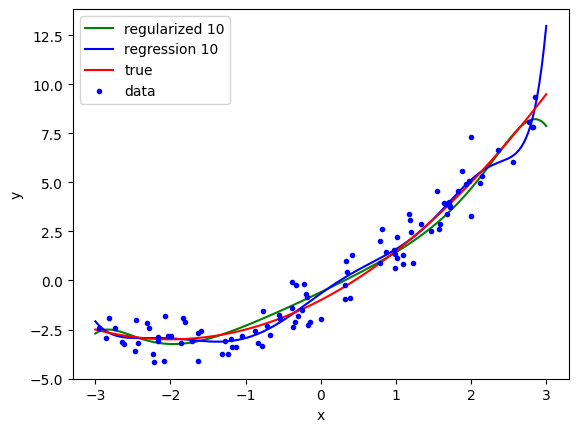

In [12]:
# plot prediction and ground truth (noiseless) function
plot(x_plot, model10(x_plot, w10r), 'g-', label='regularized 10')
plot(x_plot, model10(x_plot, w10), 'b-', label='regression 10')
plot(x_plot, model(x_plot, w_true), 'r-', label='true')
xlabel('x')
ylabel('y')
plot(x, t, 'bo', markersize=3, label='data')                  # data (blue)
legend()

Same in sklearn:

In [13]:
from sklearn.linear_model import LinearRegression, Lasso

In [14]:
reg = LinearRegression(fit_intercept=False)
reg.fit(Phi10, t)
print(reg.coef_ - w10)

[ 9.01367869e-11 -5.21866994e-11 -6.40035247e-11  5.39552847e-11
  4.56193971e-11 -2.46783149e-11 -1.62663633e-11  4.23448776e-12
  2.40854905e-12 -2.41967904e-13 -1.24569192e-13]


## Lasso (L1) regularization
Minimizing
$$\frac{1}{2N} \sum_{n=1}^N \left(t-y(x; w)\right)^2 + \alpha\sum_d |w_d|$$

[-8.31226570e-01  2.28661318e+00  2.66291550e-01 -9.58539445e-02
  7.20464453e-02  1.31052709e-02 -5.13901966e-03 -2.49389203e-03
 -9.78149721e-04  2.07197378e-04  1.09318176e-04]


f:\GIT\GitHub\edu_MethodsAndTools\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.204e+01, tolerance: 1.158e-01
  model = cd_fast.enet_coordinate_descent(


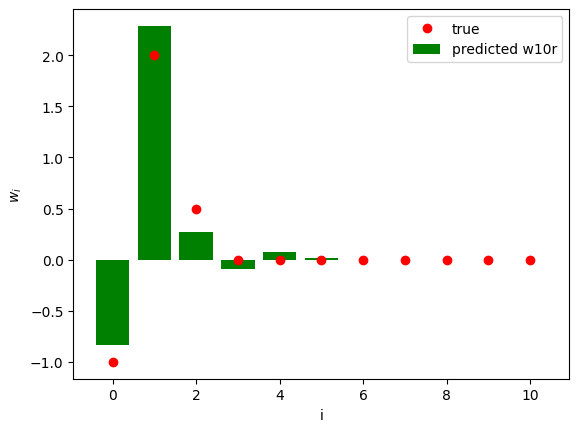

In [15]:
reg = Lasso(alpha=.01, fit_intercept=False, selection='random')
reg.fit(Phi10, t)
print(reg.coef_)
# plot coefficients
bar(range(len(reg.coef_)), height=reg.coef_, bottom=0, color='green', label='predicted w10r')
plot(w_true + [0]*8, 'ro', label='true')
xlabel('i')
ylabel('$w_i$')
legend();

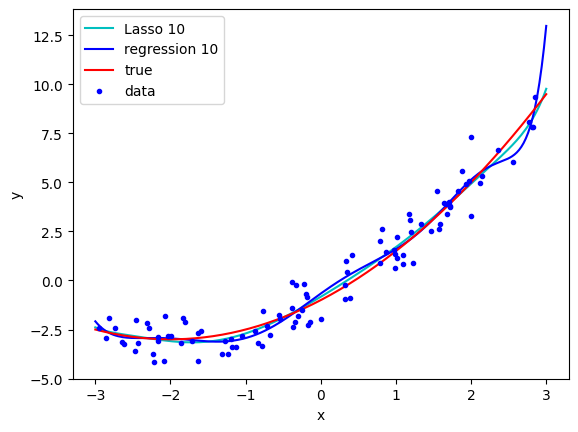

In [16]:
# plot prediction and ground truth (noiseless) function
plot(x_plot, model10(x_plot, reg.coef_), 'c-', label='Lasso 10')
plot(x_plot, model10(x_plot, w10), 'b-', label='regression 10')
plot(x_plot, model(x_plot, w_true), 'r-', label='true')
xlabel('x')
ylabel('y')
plot(x, t, 'bo', markersize=3, label='data')                  # data (blue)
legend()

### Penalize high order terms (still Lasso)

[-0.8502449696826746, 1.982782241328145, 0.44306966260618813, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0]


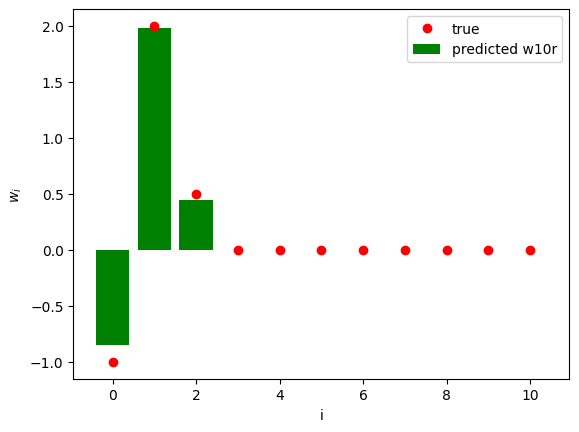

In [17]:
reg_base = 4
Phi10x = np.stack([x**i_ / reg_base**i_ for i_ in range(11)], axis=1)
model10x = lambda x, w: sum([w[i_] * x**i_ / reg_base**i_ for i_ in range(11)])

reg = Lasso(alpha=0.01, fit_intercept=False, selection='random')
reg.fit(Phi10x, t)
orig_coeffs = [reg.coef_[i_] / reg_base**i_ for i_ in range(11)]
print(orig_coeffs)
# plot coefficients
bar(range(len(reg.coef_)), height=orig_coeffs, bottom=0, color='green', label='predicted w10r')
plot(w_true + [0]*8, 'ro', label='true')
xlabel('i')
ylabel('$w_i$')
legend();

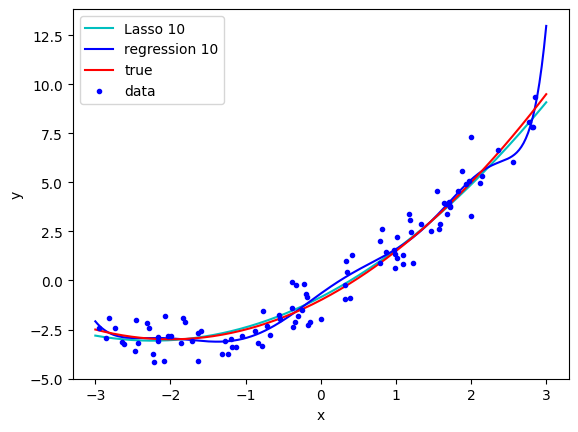

In [18]:
# plot prediction and ground truth (noiseless) function
plot(x_plot, model10x(x_plot, reg.coef_), 'c-', label='Lasso 10')
plot(x_plot, model10(x_plot, w10), 'b-', label='regression 10')
plot(x_plot, model(x_plot, w_true), 'r-', label='true')
xlabel('x')
ylabel('y')
plot(x, t, 'bo', markersize=3, label='data')                  # data (blue)
legend()